In [2]:
import pandas as pd
df_csv = pd.read_csv('emp.csv')
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   eid     9 non-null      int64 
 1   ename   9 non-null      object
 2   edept   9 non-null      object
 3   ecity   9 non-null      object
 4   ecost   9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 492.0+ bytes


In [3]:
products = {}
products['pid']=[101,102,103,104,105]
products['pname']=['pA','pB','pC','pD','pE']
products['pcost']=[1000,234,4442,1230,4500]
import json
with open('test.json','w') as wobj:
    json.dump(products,wobj)

In [4]:
pd.read_json('test.json')

,pid,pname,pcost
0,101,pA,1000
1,102,pB,234
2,103,pC,4442
3,104,pD,1230
4,105,pE,4500


In [5]:
df_json = pd.read_json('test.json')


In [7]:
df_excel = pd.read_excel('sales_data.xlsx')

In [8]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   eid     9 non-null      int64 
 1   ename   9 non-null      object
 2   edept   9 non-null      object
 3   ecity   9 non-null      object
 4   ecost   9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 492.0+ bytes


In [9]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     5 non-null      int64 
 1   pname   5 non-null      object
 2   pcost   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [10]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3 non-null      int64         
 1   product    3 non-null      object        
 2   amount     3 non-null      int64         
 3   sale_date  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 228.0+ bytes


In [15]:
import sqlite3
conn = sqlite3.connect('emp.db')
cur = conn.cursor()
cur.execute("create table emp(eid INT,ename TEXT,edept TEXT,ecost INT)")

In [16]:
cur.execute("insert into emp(eid,ename,edept,ecost) values(101,'Arun','sales',1000)")

In [17]:
cur.execute("insert into emp(eid,ename,edept,ecost) values(102,'Anu','HR',2000)")
cur.execute("insert into emp(eid,ename,edept,ecost) values(103,'vijay','Prod',3000)")
cur.execute("insert into emp(eid,ename,edept,ecost) values(104,'Leo','sales',4000)")
cur.execute("insert into emp(eid,ename,edept,ecost) values(105,'Paul','sales',5300)")
cur.execute("insert into emp(eid,ename,edept,ecost) values(106,'Bibu','admin',2100)")

In [18]:
conn.commit()

In [19]:
conn.close()

In [20]:
import sqlite3
conn = sqlite3.connect('emp.db')

In [21]:
pd.read_sql_query("select *from emp",conn)

,eid,ename,edept,ecost
0,101,Arun,sales,1000
1,102,Anu,HR,2000
2,103,vijay,Prod,3000
3,104,Leo,sales,4000
4,105,Paul,sales,5300
5,106,Bibu,admin,2100


In [22]:
df_db = pd.read_sql_query("select *from emp",conn)
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   eid     6 non-null      int64 
 1   ename   6 non-null      object
 2   edept   6 non-null      object
 3   ecost   6 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes


In [23]:
df_db.to_sql("new_emp",conn)

6

In [24]:
df_csv.to_csv("e1.csv")

In [ ]:
## Collective data (or) more than one values ---> single value
# -----------------------------------------
# [ ...... ] -> max,min,sum,count,avg,groupby...

In [25]:
data = {}
data['depts']=['prod','sales','HR','prod','sales','sales']
data['cost']=[6000,4500,7500,5500,3450,6200]
data['count']=[20,30,28,35,40,45]

df = pd.DataFrame(data)

In [26]:
df

,depts,cost,count
0,prod,6000,20
1,sales,4500,30
2,HR,7500,28
3,prod,5500,35
4,sales,3450,40
5,sales,6200,45


In [28]:
df['cost']

0    6000
1    4500
2    7500
3    5500
4    3450
5    6200
Name: cost, dtype: int64

In [29]:
df['cost'].sum()

np.int64(33150)

In [33]:
print(f"Sum = {df['cost'].sum()}")
print(f"Mean = {df['cost'].mean()}")
print(f"TotalCount = {df['cost'].count()}")

Sum = 33150
Mean = 5525.0
TotalCount = 6


In [34]:
print(f"Standard deviation = {df['cost'].std()}")

Standard deviation = 1409.8758810618756


In [35]:
print(f"Minimum Cost = {df['cost'].min()}")
print(f"Maximum Cost = {df['cost'].max()}")


Minimum Cost = 3450
Maximum Cost = 7500


In [37]:
# SQL 
# select dept,avg(cost) from emp group by dept;

df.groupby("depts")["cost"].mean()

depts
HR       7500.000000
prod     5750.000000
sales    4716.666667
Name: cost, dtype: float64

In [ ]:
df.groupby("depts")["cost"].mean()

In [38]:
df.groupby("depts")["cost"].max() # maximum cost

depts
HR       7500
prod     6000
sales    6200
Name: cost, dtype: int64

In [39]:
df.groupby("depts")["cost"].agg(['mean','max'])

,mean,max
depts,,
HR,7500.000000,7500
prod,5750.000000,6000
sales,4716.666667,6200


In [40]:
def salary_range(x):  #<== user defined function 
    r = x.max() - x.min()
    return r

df.groupby("depts")['cost'].agg(salary_range)

depts
HR          0
prod      500
sales    2750
Name: cost, dtype: int64

In [ ]:
def salary_range(x):  #<== user defined function 
    return  x.max() - x.min()
###################################################### // lambda 

df.groupby("depts")['cost'].agg(salary_range)

In [41]:
f = lambda x: x.max() - x.min()
df.groupby("depts")['cost'].agg(f)

depts
HR          0
prod      500
sales    2750
Name: cost, dtype: int64

In [42]:
df.groupby("depts")['cost'].agg(lambda x: x.max() - x.min())

depts
HR          0
prod      500
sales    2750
Name: cost, dtype: int64

In [ ]:
####

In [43]:
emp_data = {}
emp_data ['name'] = ['Arun','Vijay','John','Leo']
emp_data ['Age'] = [25,34,33,29]

df = pd.DataFrame(emp_data)
df

,name,Age
0,Arun,25
1,Vijay,34
2,John,33
3,Leo,29


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   Age     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [45]:
# Adding new column - dict logic 
df['Cost'] = [1000,2000,3000,4000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   Age     4 non-null      int64 
 2   Cost    4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [46]:
df.columns

Index(['name', 'Age', 'Cost'], dtype='object')

In [48]:
df['Cost']

0    1000
1    2000
2    3000
3    4000
Name: Cost, dtype: int64

In [49]:
df['Cost'] * 0.18

0    180.0
1    360.0
2    540.0
3    720.0
Name: Cost, dtype: float64

In [50]:
df['Tax'] = df['Cost'] * 0.18
df

,name,Age,Cost,Tax
0,Arun,25,1000,180.0
1,Vijay,34,2000,360.0
2,John,33,3000,540.0
3,Leo,29,4000,720.0


In [54]:
# To add new record/row  -> use .loc 

df.loc[len(df) - 1 ]

name      Leo
Age        29
Cost     4000
Tax     720.0
Name: 3, dtype: object

In [55]:
# To add new record/row  -> use .loc
df.loc[len(df)] = ['Anu',23,4590,240]

In [56]:
df

,name,Age,Cost,Tax
0,Arun,25,1000,180.0
1,Vijay,34,2000,360.0
2,John,33,3000,540.0
3,Leo,29,4000,720.0
4,Anu,23,4590,240.0


In [57]:
# Another way to add new row to an existing dataframe
new_record = {'name':'Theeb','Age':37,'Cost':3000,'Tax':540}

df.loc[len(df)] = new_record

In [58]:
df

,name,Age,Cost,Tax
0,Arun,25,1000,180.0
1,Vijay,34,2000,360.0
2,John,33,3000,540.0
3,Leo,29,4000,720.0
4,Anu,23,4590,240.0
5,Theeb,37,3000,540.0


In [59]:
## Another way
df.loc[6] = ['Bibu',32,1000,180]
df

,name,Age,Cost,Tax
0,Arun,25,1000,180.0
1,Vijay,34,2000,360.0
2,John,33,3000,540.0
3,Leo,29,4000,720.0
4,Anu,23,4590,240.0
5,Theeb,37,3000,540.0
6,Bibu,32,1000,180.0


In [60]:
df.loc[1] = ['Kumar',33,2000,360] ## Index - 1 already exists ->overwrite
df

,name,Age,Cost,Tax
0,Arun,25,1000,180.0
1,Kumar,33,2000,360.0
2,John,33,3000,540.0
3,Leo,29,4000,720.0
4,Anu,23,4590,240.0
5,Theeb,37,3000,540.0
6,Bibu,32,1000,180.0


In [ ]:
df.shape -->(5000,25) 
|
apply - sampling ->random sampling 
|
df.sample(n=50) 

In [ ]:
## Tasks
## ------
1. Load emp.csv file ->dataframe
2. get info about loaded dataframe
3. list out row index,column index
4. display df shape
5. Test - any duplicated values are exists --> droup duplicate ->update to input dataframe
6. Test - any null/empty value are exists -> replace 
7. Rename some column
8. Aggregate some column
9. Write cleaned dataframe into new file
-------------------------------------------

In [61]:
# Load the external file
df = pd.read_csv('emp.csv')

# info about file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   eid     9 non-null      int64 
 1   ename   9 non-null      object
 2   edept   9 non-null      object
 3   ecity   9 non-null      object
 4   ecost   9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 492.0+ bytes


In [62]:
# 3. list out row index,column index

print(df.index)
print(df.columns)


RangeIndex(start=0, stop=9, step=1)
Index(['eid', 'ename', 'edept', 'ecity', 'ecost'], dtype='object')


In [63]:
# 4. display df shape
df.shape

(9, 5)

In [65]:
# 5. Test - any duplicated values are exists --> droup duplicate ->update to input dataframe
df.duplicated().sum()

np.int64(0)

In [66]:
# df.drop_duplicated(inplace=True)
# 6. Test - any null/empty value are exists -> replace 

df.isnull().sum()

eid      0
ename    0
edept    0
ecity    0
ecost    0
dtype: int64

In [67]:
# df.fillna(df['cost'].mean(df)*100),inplace=True) # replace NaN value
# 7. Rename some column
df.columns

Index(['eid', 'ename', 'edept', 'ecity', 'ecost'], dtype='object')

In [68]:
df.rename(columns={'edept':'DEPT'},inplace=True)

In [69]:
df.columns

Index(['eid', 'ename', 'DEPT', 'ecity', 'ecost'], dtype='object')

In [70]:
df

,eid,ename,DEPT,ecity,ecost
0,101,raj,sales,pune,1000
1,102,leo,prod,bglore,2301
2,230,raj,prod,pune,2300
3,450,shan,sales,bglore,3401
4,542,anu,HR,mumbai,4590
5,321,bibu,sales,hyd,5419
6,651,ram,hr,bglore,3130
7,541,leo,admin,chennai,4913
8,652,karthik,sales,bglore,3405


In [71]:
# 8. Aggregate some column

df.groupby("DEPT")["ecost"].agg(['mean','max'])

,mean,max
DEPT,,
HR,4590.00,4590
admin,4913.00,4913
hr,3130.00,3130
prod,2300.50,2301
sales,3306.25,5419


In [72]:
# 9. Write cleaned dataframe into new file

df.to_csv('e1.csv',index=False)

In [73]:
pd.read_csv('e1.csv')

,eid,ename,DEPT,ecity,ecost
0,101,raj,sales,pune,1000
1,102,leo,prod,bglore,2301
2,230,raj,prod,pune,2300
3,450,shan,sales,bglore,3401
4,542,anu,HR,mumbai,4590
5,321,bibu,sales,hyd,5419
6,651,ram,hr,bglore,3130
7,541,leo,admin,chennai,4913
8,652,karthik,sales,bglore,3405


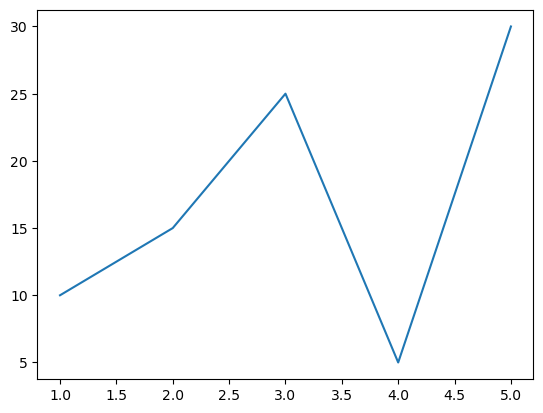

In [74]:
import matplotlib.pyplot
matplotlib.pyplot.plot([1,2,3,4,5],[10,15,25,5,30])


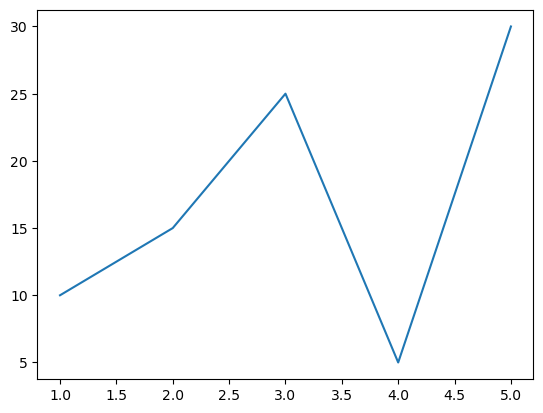

In [75]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5],[10,15,25,5,30])

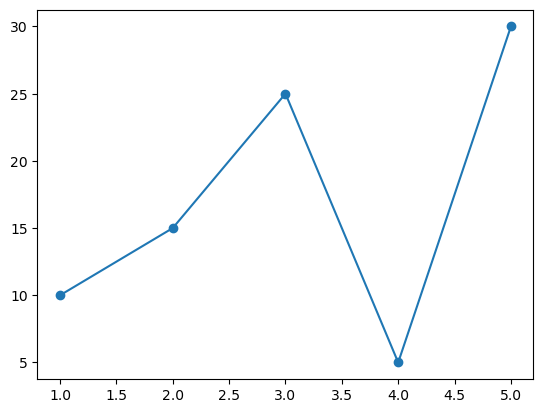

In [76]:
plt.plot([1,2,3,4,5],[10,15,25,5,30],marker='o')

In [78]:
#help(plt.plot)

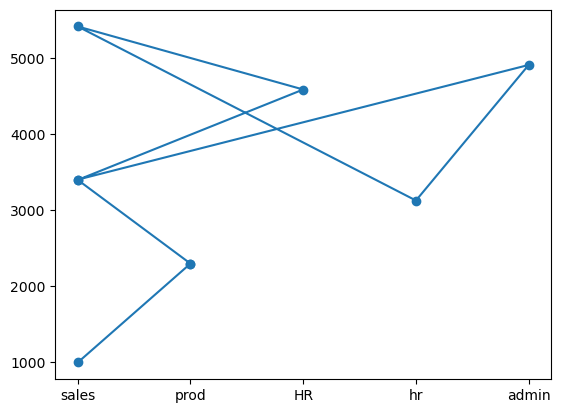

In [80]:
plt.plot(df['DEPT'],df['ecost'],marker='o')

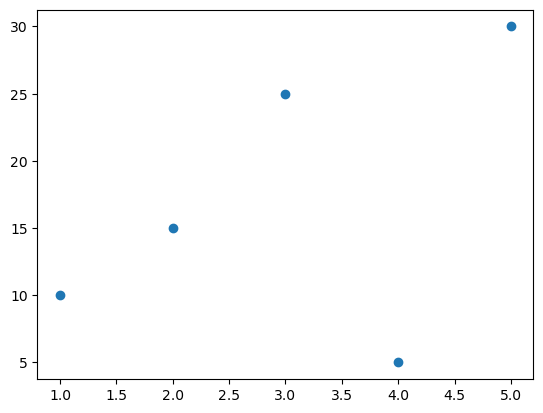

In [81]:
plt.scatter([1,2,3,4,5],[10,15,25,5,30])

<BarContainer object of 5 artists>

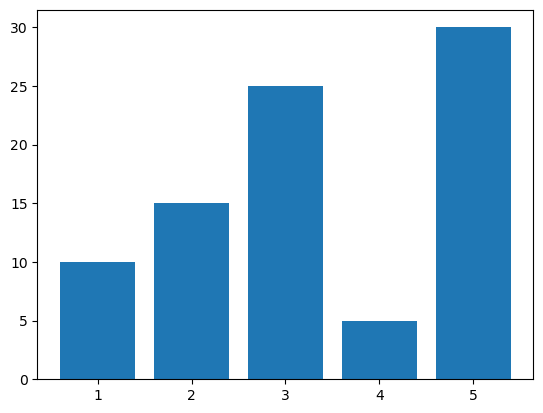

In [82]:
plt.bar([1,2,3,4,5],[10,15,25,5,30])

<BarContainer object of 5 artists>

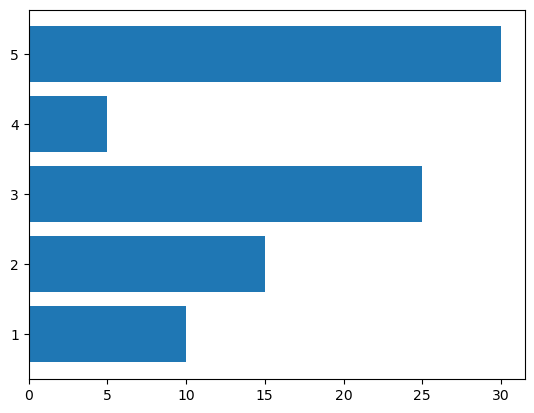

In [83]:
plt.barh([1,2,3,4,5],[10,15,25,5,30])

<BarContainer object of 9 artists>

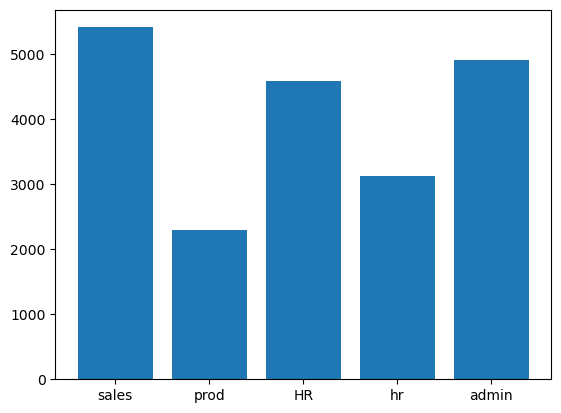

In [85]:
plt.bar(df['DEPT'],df['ecost'])

<BarContainer object of 9 artists>

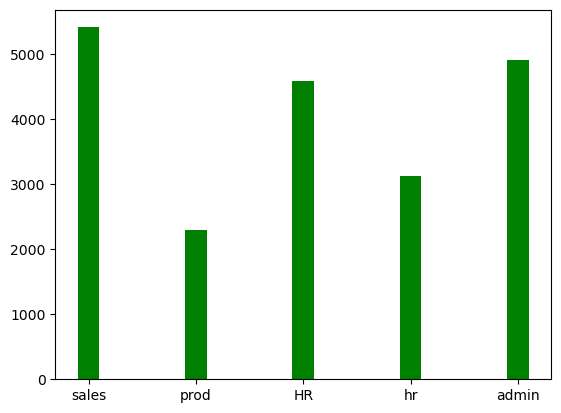

In [88]:
plt.bar(df['DEPT'],df['ecost'],width=0.2,color='green')

<BarContainer object of 9 artists>

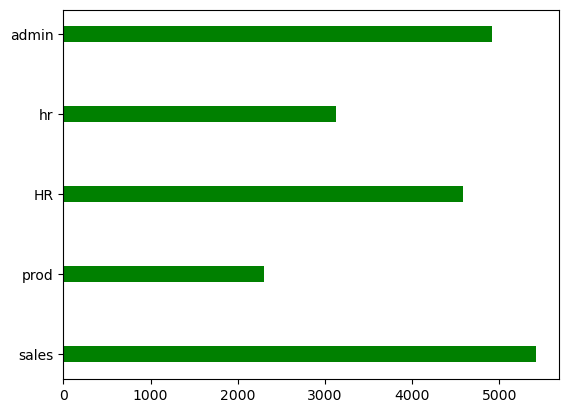

In [89]:
plt.barh(df['DEPT'],df['ecost'],height=0.2,color='green')

In [ ]:
numpy - computing
pandas - data analysis
matplotlib - visualization

In [ ]:
# Extract - Transform - Load 
# ------------------------------

1. Extract data from dataset => df = pd.read_csv('input_dataset')
|
2. Transform 
       -> fill missing value - replace missing values
       -> do aggregate operation ->result ->to add new columns 
|
3. Load - load the data to database => df.to_sql("<tableName>",connection_object,if_exists="replace",index=False) 
                                       connection_object.close()
-------------------------------------------


In [93]:
# Extract
df = pd.read_csv('emp.csv')
# df - raw data

# Transform
df['ecost'].fillna(df['ecost'].mean(),inplace=True)
df['ecity'].fillna('Delhi',inplace=True)


C:\Users\karth\AppData\Local\Temp\ipykernel_28696\1496213973.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ecost'].fillna(df['ecost'].mean(),inplace=True)


In [96]:
df['Avg'] = df.groupby("edept")["ecost"].agg('mean')

In [97]:
df.columns

Index(['eid', 'ename', 'edept', 'ecity', 'ecost', 'Avg'], dtype='object')

In [99]:
df # Transformed data

,eid,ename,edept,ecity,ecost,Avg
0,101,raj,sales,pune,1000,NaN
1,102,leo,prod,bglore,2301,NaN
2,230,raj,prod,pune,2300,NaN
3,450,shan,sales,bglore,3401,NaN
4,542,anu,HR,mumbai,4590,NaN
5,321,bibu,sales,hyd,5419,NaN
6,651,ram,hr,bglore,3130,NaN
7,541,leo,admin,chennai,4913,NaN
8,652,karthik,sales,bglore,3405,NaN


In [100]:
conn = sqlite3.connect("emp_csv.db")
df.to_sql("emps",conn,if_exists="replace",index=False)
conn.close()
### Load 

In [101]:
conn = sqlite3.connect("emp_csv.db")
pd.read_sql_query("select *from emps",conn)  # testing

,eid,ename,edept,ecity,ecost,Avg
0,101,raj,sales,pune,1000,None
1,102,leo,prod,bglore,2301,None
2,230,raj,prod,pune,2300,None
3,450,shan,sales,bglore,3401,None
4,542,anu,HR,mumbai,4590,None
5,321,bibu,sales,hyd,5419,None
6,651,ram,hr,bglore,3130,None
7,541,leo,admin,chennai,4913,None
8,652,karthik,sales,bglore,3405,None


In [102]:
 df.groupby("edept")["ecost"].agg('mean')

edept
HR       4590.00
admin    4913.00
hr       3130.00
prod     2300.50
sales    3306.25
Name: ecost, dtype: float64

In [103]:
####
pd.read_csv("customers.csv")

,id,name,age,city,salary
0,1,Arun,25.0,Bangalore,40000.0
1,2,Kiran,NaN,Chennai,50000.0
2,3,Meena,35.0,NaN,60000.0
3,4,Ravi,28.0,Hyderabad,NaN


In [104]:
# Extract
df = pd.read_csv("customers.csv")

# Tranform
df['age'].fillna(df['age'].median(),inplace=True)
df['city'].fillna('Delhi',inplace=True)
df['salary'].fillna(df['salary'].mean(),inplace=True)

df['age_group'] = df['age'].apply(lambda a: 'Young' if a < 30 else "Adult")
df

C:\Users\karth\AppData\Local\Temp\ipykernel_28696\950101428.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
C:\Users\karth\AppData\Local\Temp\ipykernel_28696\950101428.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

,id,name,age,city,salary,age_group
0,1,Arun,25.0,Bangalore,40000.0,Young
1,2,Kiran,28.0,Chennai,50000.0,Young
2,3,Meena,35.0,Delhi,60000.0,Adult
3,4,Ravi,28.0,Hyderabad,50000.0,Young


In [105]:
# Load
conn = sqlite3.connect("organization.db")
df.to_sql("customers",conn,if_exists="replace",index=False)
conn.close()

In [106]:
conn = sqlite3.connect("organization.db")
pd.read_sql_query("select *from customers",conn)

,id,name,age,city,salary,age_group
0,1,Arun,25.0,Bangalore,40000.0,Young
1,2,Kiran,28.0,Chennai,50000.0,Young
2,3,Meena,35.0,Delhi,60000.0,Adult
3,4,Ravi,28.0,Hyderabad,50000.0,Young


In [ ]:
#####

In [ ]:
# REST methods
Client ------>Requests ------->Server ..
        --------<---------------------- //data response - json 
requests 
 - REST API 
import json
json.dumps()
json.loads()
|
json.dump(<python-data>,storage>)
json.load(jsonFile) ->python_data
--------------------------------------------
GET - read the data/get the data 
POST - create new resource / data
PUT - modify the entire resource 
PATCH - modify the particular resource 
DELETE - delete the resource 

In [107]:
import requests

In [ ]:
import requests <== (1)
requests.get('URL') --->return_status_code  <== (2)
                |--->WebURL 

return_status_code.headers <==(3)  - web header info

return_status_code.text <==(4)  - download the webcontent 

In [108]:
r1 = requests.get('https://www.google.com/')
r1.status_code

200

In [110]:
r1.headers

{'Date': 'Fri, 27 Feb 2026 11:27:24 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-QkqgaCyBHDok-dFEst5MMA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'Reporting-Endpoints': 'default="//www.google.com/httpservice/retry/jserror?ei=nH-hafavDI_R1sQPjfTeyAQ&cad=crash&error=Page%20Crash&jsel=1&bver=2385&dpf=R1rUI9Sdhjp9WBZQqRjAJUzI5FatBhRlNOuotFVsaQs"', 'Accept-CH': 'Sec-CH-Prefers-Color-Scheme', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '__Secure-STRP=AD6DogtXFOobY4_7JK7V7Y43yBbsWAFq26zTqpaUOZE-CXGFIiLEf5jRaQLHwyiSCll4I_xTrld7JAZ-VqN2DRSb922ltjS6Ig; expires=Fri, 27-Feb-2026 11:32:24 GMT; path=/; domain=.

In [112]:
print(r1.headers['Content-Type'])

text/html; charset=ISO-8859-1


In [114]:
web_page = r1.text # download webcontent
print(type(web_page),len(web_page))

<class 'str'> 19752


In [115]:
with open('test.html','w') as wobj:
    wobj.write(web_page)

In [109]:
r2 = requests.get('https://jsonplaceholder.typicode.com/posts/1')
r2.status_code

200

In [111]:
r2.headers

{'Date': 'Fri, 27 Feb 2026 11:27:43 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'access-control-allow-credentials': 'true', 'Cache-Control': 'max-age=43200', 'etag': 'W/"124-yiKdLzqO5gfBrJFrcdJ8Yq0LGnU"', 'expires': '-1', 'nel': '{"report_to":"heroku-nel","response_headers":["Via"],"max_age":3600,"success_fraction":0.01,"failure_fraction":0.1}', 'pragma': 'no-cache', 'report-to': '{"group":"heroku-nel","endpoints":[{"url":"https://nel.heroku.com/reports?s=fYWdnEf0DmCzgr0VsN5e6AtGFTukaisQ17mn0sPpnh8%3D\\u0026sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d\\u0026ts=1769696362"}],"max_age":3600}', 'reporting-endpoints': 'heroku-nel="https://nel.heroku.com/reports?s=fYWdnEf0DmCzgr0VsN5e6AtGFTukaisQ17mn0sPpnh8%3D&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&ts=1769696362"', 'Server': 'cloudflare', 'vary': 'Origin, Accept-Encoding', 'via': '2.0 heroku-router', 'x-content-type-options': 'nosniff', 'x-powered-by': 'Express', 'x-rate

In [113]:
print(r2.headers['Content-Type'])

application/json; charset=utf-8


In [116]:
r2.json() # convert from json ->python 

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [117]:
python_data = r2.json()

In [ ]:
## Another way
json_data = r2.text
python_data = json.loads(json_data)


In [118]:
print(type(python_data))

<class 'dict'>


In [119]:
python_data

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [120]:
## GET  - read an existing resource 
r2 = requests.get('https://jsonplaceholder.typicode.com/posts/1')
print(r2.status_code)
print(r2.headers['Content-Type'])
python_data = r2.json() # from json ->python 
print(python_data)     

200
application/json; charset=utf-8
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In [ ]:
### POST - create a new resource 
requests.post(url,json = data) ->status_code - 201

In [121]:
URL = "https://jsonplaceholder.typicode.com/posts"
data = {"title": "python REST demo","body":"sample post data","userID":101}

response = requests.post(URL,json=data)
print("status_code:",response.status_code)
print("data:",response.json())

status_code: 201
data: {'title': 'python REST demo', 'body': 'sample post data', 'userID': 101, 'id': 101}


In [ ]:
## PUT - modify an existing resource 
requests.put(URL,json=updated_data) ->status_code ->200 

In [1]:
import requests
URL = "https://jsonplaceholder.typicode.com/posts/1"

In [2]:
requests.get(URL).json() # reading data

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [3]:
updated_data = {'id':1,'title':'Updated title','body':'updated body content','userId':1}
response = requests.put(URL,json=updated_data)

print('response_status_code:',response.status_code)
print('updated data:',response.json())

response_status_code: 200
updated data: {'id': 1, 'title': 'Updated title', 'body': 'updated body content', 'userId': 1}


In [4]:
## Patch - partitial update
partial_data = {'title':'Partially_Updated'}
response = requests.patch(URL,json=partial_data)

print('response_status_code:',response.status_code)
print('updated data:',response.json())

response_status_code: 200
updated data: {'userId': 1, 'id': 1, 'title': 'Partially_Updated', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In [ ]:
## delete - 
requests.delete(URL)

In [5]:
r = requests.delete(URL)
print(r.status_code)

200


In [6]:
r.json()

{}

In [ ]:
###################

In [ ]:
Flask - micro webframe work
-----
 |->MVT
 |->decorator design style - adding new features to an existing code
 |->URL binding


In [7]:
r = requests.get('http://127.0.0.1:1234/data')
r.headers

{'Server': 'Werkzeug/3.1.5 Python/3.14.2', 'Date': 'Fri, 27 Feb 2026 12:05:19 GMT', 'Content-Type': 'application/json', 'Content-Length': '917', 'Connection': 'close'}

In [8]:
r = requests.get('http://127.0.0.1:1234/view')
r.headers

{'Server': 'Werkzeug/3.1.5 Python/3.14.2', 'Date': 'Fri, 27 Feb 2026 12:05:41 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '1782', 'Connection': 'close'}

In [9]:
r = requests.get('http://127.0.0.1:1234/data')
r.json()

{'students': [[1,
   'saravana',
   'saravana@gmail.com',
   '5th A Block',
   '99020442404',
   'Pauls College',
   'Bangalore',
   'KA'],
  [2,
   'Shanmuga',
   'shanmuga@gmail.com',
   '6th Block',
   '8940434356',
   'APC College',
   'Chennai',
   'TN'],
  [3,
   'Ranga',
   'Ranga@gmail.com',
   '4th B Block',
   '8494959235',
   'SVA',
   'Hyderabad',
   'TS'],
  [4,
   'KumarPai',
   'Kupa@gmail.com',
   '3rd Block',
   '399442552',
   'AMC',
   'Bangalore',
   'KA'],
  [5,
   'Yeswanth',
   'Yes@gmail.com',
   '9th A main',
   '89394323234',
   'CRO',
   'Ba',
   ''],
  [6,
   'Sagar',
   'Sagar@gmail.com',
   '2nd Block',
   '78939494134',
   'SAPL',
   'Hyderabad',
   'TS']]}